In [19]:
import pandas as pd

# 문제 정의

서울 지역(구)의 경도와 위도 정보를 사용하여, 임의로 입력된 지역(동)을  
강동, 강서, 강남, 강북으로 분류해보는 예제입니다.

# 데이터 수집
아래는 서울의 대표적인 구(district) 위치 데이터입니다.  
구(district) 정보는 학습에 사용하도록 하겠습니다.

### 컬럼 주석 
**district**: 행정구역 (서초구, 송파구, 용산구 등, 서울의 단위 지역 분류입니다)  
**dong**: 구(district)보다 작은 행정구역 (대치동, 도곡동, 암사동 등, 서울의 소단위 분류입니다)  
**longitude**: 경도  
**latitude**: 위도    
**label**: 한강 기준으로 동,서,남,북으로 구분한 지역 명칭  

In [20]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

아래는 서울의 대표적인 동 위치 데이터입니다.  
동 정보는 테스트 시 사용하도록 하겠습니다.

In [21]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [22]:
# 현재 가지고 있는 데이터에서, 레이블의 갯수를 확인
train_df.label.value_counts()

Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64

In [23]:
test_df.label.value_counts()

Gangseo     5
Gangbuk     5
Gangdong    5
Gangnam     5
Name: label, dtype: int64

레이블의 갯수를 확인한 결과, 우리의 데이터는   
Gangbuk(강북), Gangseo(강서), Gangdong(강동), Gangnam(강남)이라는 4가지 분류값을 가지고 있습니다.  
이번 예제에서는 위도와 경도 정보만으로, 그 지역의 레이블을 예측해볼 수 있도록,  
데이터를 전처리해보도록 하겠습니다.

# 데이터 전처리
먼저, 경도와 위도의 평균과 편차를 보도록 하겠습니다.

In [24]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


경도와 위도는 같은 단위를 사용하는 것을 확인하실 수 있습니다.  
이번 예제는 의사결정트리로 데이터를 분류해보도록 하겠습니다.  
의사결정트리는 각 특징을 독립적으로 사용하기 때문에, 이번 예제에서는 별다른 전처리 과정이 필요없습니다.  

In [25]:
train_df.head()

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo


In [26]:
test_df.head()

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo


# 데이터 시각화

데이터를 특징을 바탕으로 한 공간에 데이터 특징을 시각화함으로써,  
우리는 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분지을 수 있고,  
데이터의 패턴을 눈으로 쉽게 파악할 수 있습니다.

Text(0.5,1,'district visualization in 2d plane')

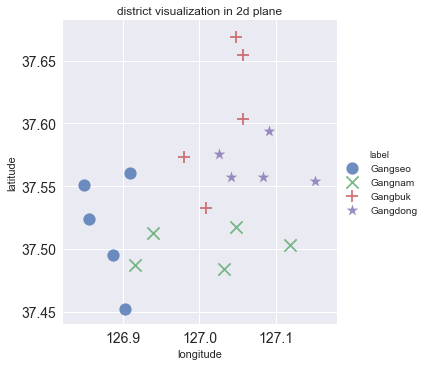

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 경도, 위도에 따른 데이터 시각화
sns.lmplot('longitude', 'latitude', data=train_df, fit_reg=False,  # x 축, y 축, 데이터, 라인 없음
           scatter_kws={"s": 150}, # 좌표 상의 점의 크기
           markers=["o", "x", "+", "*"],
           hue="label")

# title
plt.title('district visualization in 2d plane')

강서는 동그라미, 강북은 +, 강남은 X, 강동은 별모양으로 표시가 되었습니다.

시각화를 통해, 강서는 중심으로부터 서쪽에, 강동은 중심으로부터 동쪽에,  
강북은 중심으로부터 북쪽에, 강남은 중심으로부터 남쪽에 위치하는 패턴을,  
쉽게 눈으로 파악할 수 있습니다.

# 데이터 다듬기
학습 및 테스트에 필요 없는 특징(feature)을 데이터에서 제거합니다.  
구 이름 및 동 이름은 학습 및 테스트에 필요 없으므로, 제거합니다.

In [28]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace = True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [29]:
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [30]:
def display_decision_surface(clf,X, y):
    
    # 챠트의 범위가 모든 학습 데이터를 포함하도록 설정
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    # 파라미터 설정
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # 학습 데이터를 챠트에 표시
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, 
                    X.loc[idx].latitude, 
                    c=color, 
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)

    # 챠트 제목
    plt.title("Decision surface of a decision tree",fontsize=16)
    # 챠트 기호 설명
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    # x축의 이름과 폰트 크기 설정
    plt.xlabel('longitude',fontsize=16)
    # y축의 이름과 폰트 크기 설정
    plt.ylabel('latitude',fontsize=16)
    # 챠트 크기 설정
    plt.rcParams["figure.figsize"] = [7,5]
    # 챠트 폰트 크기 설정
    plt.rcParams["font.size"] = 14
    # x축 좌표상의 폰트 크기 설정
    plt.rcParams["xtick.labelsize"] = 14
    # y축 좌표상의 폰트 크기 설정
    plt.rcParams["ytick.labelsize"] = 14

    # 챠트 그리기
    plt.show()

# 파라미터 없이 학습한 모델의 결정 표면 시각화
의사결정트리는 오버피팅되기 상당히 쉬운 모델입니다.  
별도의 파라미터를 설정해주지 않을 경우, 최대한 학습데이터에만 잘 맞게 모델이 형성됩니다 (오버피팅).  
아래 챠트를 통해, 학습된 모델이 강남, 강북, 강동, 강서 지역 구분이라기 보다는,   
단순히 학습 데이터 구분에만 집중된 모델임을 볼 수 있습니다.

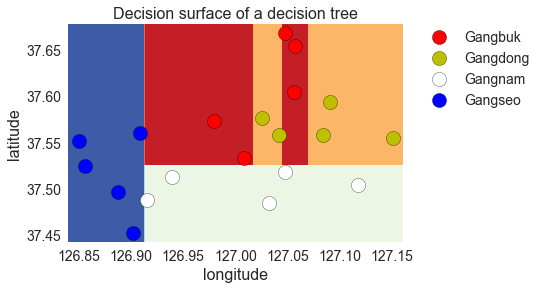

In [31]:
# pyplot은 숫자로 표현된 레이블을 시각화할 수 있음
# LabelEncoder로 레이블을 숫자로 변경
le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state=35).fit(X_train, y_encoded)
display_decision_surface(clf,X_train, y_encoded)

# 파라미터 설정한 모델의 결정 표면 시각화
아래는 오버피팅을 피하기 위해 별도의 파라미터를 설정한 의사결정트리의 의사결정표면 챠트입니다.  
오버피팅된 이전의 모델보다, 우리가 목표로 설정한  "강동, 강서, 강남, 강북" 구분하기에  
더 적절한 결정 표면을 확인할 수 있습니다.

**max_depth** : 트리의 최대 한도 깊이  
**min_samples_split** : 자식 노드를 갖기 위한 최소한의 데이터 갯수  
**mins_samples_leaf** : 맨 마지막 끝 노드의 최소 데이터 갯수  
**random_state** : 여러번 실행해도, 파라미터가 같을 경우, 결과가 항상 같게 만들어주는 파라미터 

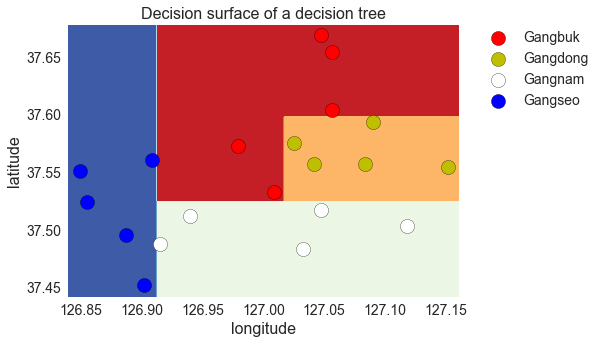

In [32]:
clf = tree.DecisionTreeClassifier(max_depth=4, 
                                  min_samples_split=2,
                                  min_samples_leaf=2, 
                                  random_state=70).fit(X_train, y_encoded.ravel())
display_decision_surface(clf,X_train, y_encoded)

# 의사결정트리 시각화
의사결정트리의 장점은 예측값이 어떤 식으로 판단되었는 지 이해가 무척 쉽다는 것입니다.  
다른 모델들에 비해, 큰 수학적인 지식이 없어도, 아래의 트리 그림을 보면, 어떻게 예측값이 도출되었는 지  
쉽게 알 수 있습니다.

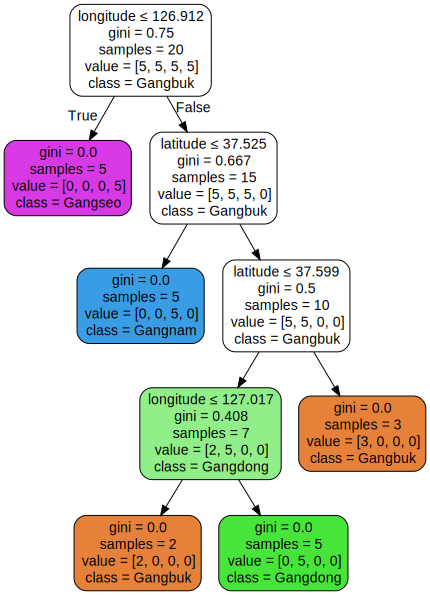

In [33]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("seoul")

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['longitude','latitude'],  
                         class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**gini** : 불순도 척도. 0일 경우, 모든 샘플이 하나의 분류값을 갖으며, 0이 아닐 경우, 1에 가까울수록, 여러 분류값이 한 노드에 존재합니다.  
**samples** : 노드 안에 들어 있는 데이터의 갯수  
**value** : 분류값 별 데이터의 갯수   
**class** :  분류값

# 테스트
모델을 테스트합니다.

In [34]:
from sklearn.metrics import accuracy_score
pred = clf.predict(X_test)

모델 예측 정확도(accuracy)를 확인합니다.

In [35]:
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), le.classes_[pred])) )

accuracy : 1.0


실제값과 예측값을 비교합니다.

In [36]:
comparison = pd.DataFrame({'prediction':le.classes_[pred], 'ground_truth':y_test.values.ravel()}) 
comparison

,ground_truth,prediction
0,Gangseo,Gangseo
1,Gangseo,Gangseo
2,Gangseo,Gangseo
3,Gangseo,Gangseo
4,Gangseo,Gangseo
5,Gangnam,Gangnam
6,Gangnam,Gangnam
7,Gangnam,Gangnam
8,Gangnam,Gangnam
9,Gangnam,Gangnam
